https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

# Utilities

In [6]:
##  preserntation for a confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [8]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5),strides=1,padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(32, (5, 5),strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 [==============================] - 62s 131ms/step - loss: 0.6135 - accuracy: 0.8175 - val_loss: 0.0823 - val_accuracy: 0.9764
Epoch 2/12
469/469 [==============================] - 61s 130ms/step - loss: 0.0814 - accuracy: 0.9760 - val_loss: 0.0489 - val_accuracy: 0.9841
Epoch 3/12
469/469 [==============================] - 62s 132ms/step - loss: 0.0531 - accuracy: 0.9837 - val_loss: 0.0482 - val_accuracy: 0.9837
Epoch 4/12
469/469 [==============================] - 62s 133ms/step - loss: 0.0419 - accuracy: 0.9873 - val_loss: 0.0375 - val_accuracy: 0.9874
Epoch 5/12
469/469 [==============================] - 39s 84ms/step - loss: 0.0334 - accuracy: 0.9896 - val_loss: 0.0397 - val_accuracy: 0.9871
Epoch 6/12
469/469 [==============================] - 31s 66ms/step - loss: 0.0302 - accuracy: 0.9908 - val_loss: 0.0362 - val_accuracy: 0.9884
Epoch 7/12
469/469 [==============================] - 30s 6

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


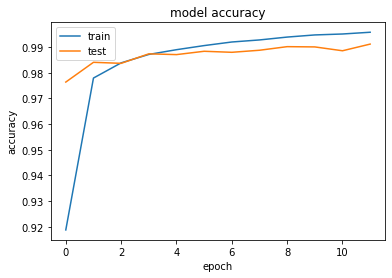

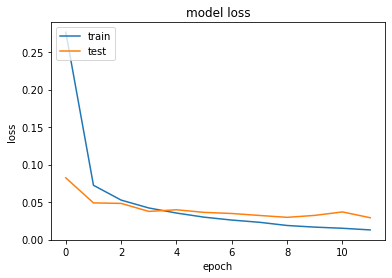

In [9]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [10]:
predictions = model.predict(x_test, verbose=0)


In [11]:


yitest = np.argmax(y_test, axis=1)

yptest = np.argmax(predictions, axis=1)
print (yitest)
print (yptest)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [12]:
## For analysis show also the confusion matrix



cfm = confusion_matrix(yitest, yptest)
print (cfm)

[[ 975    0    1    0    0    0    1    1    2    0]
 [   0 1120    0    1    1    0    3    5    5    0]
 [   0    0 1029    0    0    0    0    3    0    0]
 [   0    0    0 1008    0    2    0    0    0    0]
 [   0    0    0    0  978    0    0    0    0    4]
 [   1    0    0    8    0  878    1    1    3    0]
 [   2    2    1    0    1    1  950    0    1    0]
 [   0    1    2    1    0    0    0 1022    1    1]
 [   3    0    3    2    0    1    0    1  963    1]
 [   0    0    1    0    5    4    0    6    4  989]]


In [ ]:
plot_confusion_matrix(cfm, classes=range(10), 
                      title='Confusion matrix for MNIST')


Confusion matrix, without normalization
